In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nla
import pandas as pd

from sklearn.linear_model import LinearRegression

# Exercise 2.8

Compare the classification performance of linear regression and k–
nearest neighbor classification on the zipcode data. In particular, consider
only the 2’s and 3’s, and k = 1, 3, 5, 7 and 15. Show both the training and
test error for each choice. The zipcode data are available from the book
website www-stat.stanford.edu/ElemStatLearn.

# Solution

Load the training data

In [2]:
url_link = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz'
full_database = pd.read_csv(url_link,sep=' ',header=None,dtype={0:np.int})
del full_database[257]

# Only conisder digits 2 and 3
class_set = np.logical_or(full_database[0] == 3,full_database[0] == 2)
train_database = full_database.loc[class_set]

train_features = train_database.copy()
train_labels = train_features.pop(0)

train_database.tail()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
7282,3,-1.000,-0.882,-0.334,0.267,0.333,0.749,1.000,1.000,1.000,...,0.968,1.000,1.000,1.000,0.809,0.325,-0.82,-1.0,-1.0,-1.0
7283,3,-0.985,-0.048,0.226,0.226,0.226,-0.355,-0.807,-1.000,-0.726,...,-0.307,-0.555,-0.555,-0.555,-0.556,-1.000,-1.00,-1.0,-1.0,-1.0
7286,3,-1.000,-1.000,-1.000,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0
7287,3,-1.000,-1.000,-1.000,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0
7288,3,-1.000,-1.000,-1.000,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.00,-1.0,-1.0,-1.0


Load the test data,

In [3]:
url_link_test = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz'
full_database_test = pd.read_csv(url_link_test,sep=' ',header=None,dtype={0:np.int})

# Only conisder digits 2 and 3
class_set = np.logical_or(full_database_test[0] == 3, full_database_test[0] == 2)
test_database = full_database_test.loc[class_set]

test_features = test_database.copy()
test_labels = test_features.pop(0)

test_database.tail()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1964,2,-0.281,1.0,-0.123,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.487,0.983,1.000,0.651,-0.711,-1.000,-1.000,-1.000,-1.000,-1.0
1986,2,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1994,3,-1.000,-1.0,-1.000,-0.939,0.536,1.000,1.000,1.000,0.871,...,1.000,1.000,1.000,1.000,1.000,0.748,0.026,-0.827,-1.000,-1.0
1999,2,-1.000,-1.0,-1.000,-0.980,0.078,0.360,0.814,0.725,-0.444,...,1.000,0.524,-0.246,-0.962,-1.000,-0.978,-0.109,0.360,-0.381,-1.0
2002,3,-1.000,-1.0,-1.000,-1.000,-1.000,-0.417,0.814,1.000,0.775,...,1.000,1.000,0.554,0.184,-0.484,-1.000,-1.000,-1.000,-1.000,-1.0


### Analytical solution for linear regression

In [4]:
# Given the probability, classify the input
def classify(probability,boundary_value,classes):
    a,b = classes
    classification = np.full(probability.size,a)
    class_b = probability > boundary_value
    classification[class_b] = b
    
    return classification

def prediction_error(y,y_predict):
    N = y.size
    misclassifications  = y != y_predict
    
    # Prediction error
    prediction_error = np.mean(misclassifications)
    
    return prediction_error

In [5]:
# Training set
N_train,_ = train_features.shape
X = np.hstack((np.ones((N_train,1)),np.array(train_features)))
y = np.array(train_labels)

# Test set
N_test,_ = test_features.shape
X_test = np.hstack((np.ones((N_test,1)),np.array(test_features)))
y_test = np.array(test_labels)

# Analytic solution for linear regression with least squares
beta = nla.pinv(X.T @ X) @ X.T @ y

# Error in predictions training
y_predicted_train = X @ beta
prediction_train = classify(y_predicted_train,2.5,(2,3))
error_train = prediction_error(y,prediction_train)

# Error in prediciton test
y_predicted_test = X_test @ beta
prediction_test = classify(y_predicted_test,2.5,(2,3))
error_test = prediction_error(y_test,prediction_test)

print('Error on training = {:.2f}'.format(error_train))
print('Error on test = {:.2f}'.format(error_test))

Error on training = 0.01
Error on test = 0.04


### Training the model (linear regression)

In [7]:
model = LinearRegression()
model.fit(X, y)

y_predicted_train = model.predict(X)
LR_prediction_train = classify(y_predicted_train,2.5,(2,3))
LR_error_train = prediction_error(y,LR_prediction_train)

y_predicted_test = model.predict(X_test)
LR_prediction_test = classify(y_predicted_test,2.5,(2,3))
LR_error_test = prediction_error(y_test,LR_prediction_test)

print('Error on training = {:.2f}'.format(LR_error_train))
print('Error on test = {:.2f}'.format(LR_error_test))

Error on training = 0.01
Error on test = 0.04


### The nearest k-neighbor solution

In [8]:
def nearest_neig(x_val,X,Y,k):
    
    distance = [(nla.norm(x_val-x),y) for x,y in zip(X,Y)]
    distance.sort(key = lambda x : x[0])
    return sum([y for _,y in distance[:k]]) / k

In [10]:
X = np.array(train_features)
Y = np.array(train_labels)

X_test = np.array(test_features)
Y_test = np.array(test_labels)

ks = [1,3,5,7,15]
knn_error_train = []
knn_error_test = []

for k in ks:
    # Error in prediciton train
    knn_predicted_train = np.array([nearest_neig(x,X,Y,k) for x in X])
    knn_prediction_train = classify(knn_predicted_train,2.5,(2,3))
    knn_error_train.append(prediction_error(Y,knn_prediction_train))

    # Error in prediction test
    knn_predicted_test = np.array([nearest_neig(x,X,Y,k) for x in X_test])
    knn_prediction_test = classify(knn_predicted_test,2.5,(2,3))
    knn_error_test.append(prediction_error(Y_test,knn_prediction_test))

### Let us compare the results (errors on training/test sets)

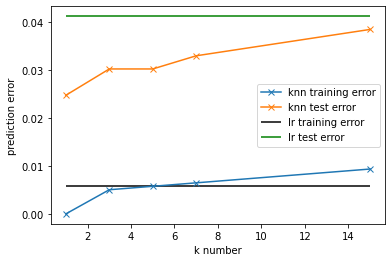

In [11]:
plt.plot(ks,knn_error_train,'x-',label='knn training error')
plt.plot(ks,knn_error_test,'x-',label='knn test error')
plt.hlines(error_train, 1, 15,colors='k',label='lr training error')
plt.hlines(error_test, 1, 15,colors='g',label='lr test error')
plt.xlabel('k number')
plt.ylabel('prediction error')
plt.legend()
plt.show()